### Car Sale Advertisements
**car**: manufacturer brand  
**price**: seller’s price in advertisement (in USD/доллар США)  
**body**: car body type  
**mileage**: as mentioned in advertisement (‘000 Km)  
**engV**: rounded engine volume (‘000 cubic cm) - объём двигателя  
**engType**: type of fuel (“Other” in this case should be treated as NA) - тип бензина    
**registration**: whether car registered in Ukraine or not - зарегистрирован ли автомобиль в Украине или нет    
**year**: year of production - год изготовления    
**model**: specific model name - модель  
**drive**: drive type - тип привода (rear - задний, front - передний, full - полноприводный)

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

import warnings
warnings.filterwarnings('ignore')

In [166]:
df = pd.read_csv('car_ad2.csv')
df.head()

,car,price,body,mileage,engV,engType,year,model,drive,price_log,engV_log
0,Ford,15500.0,0,68,2.5,1,2010,Kuga,2,9.648595,0.916291
1,Mercedes-Benz,20500.0,3,173,1.8,1,2011,E-Class,3,9.928180,0.587787
2,Mercedes-Benz,35000.0,2,135,5.5,3,2008,CL 550,3,10.463103,1.704748
3,Mercedes-Benz,17800.0,5,162,1.8,0,2012,B 180,1,9.786954,0.587787
4,Nissan,16600.0,0,83,2.0,3,2013,X-Trail,2,9.717158,0.693147


In [167]:
dataset_features = list(zip(
# признаки
[i for i in df.columns],
zip(
    # типы колонок
    [str(i) for i in df.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in df.isnull().sum()],
    [i for i in df.nunique()]
)))
# Признаки с типом данных и количеством пропусков
dataset_features

[('car', ('object', 0, 84)),
 ('price', ('float64', 0, 1300)),
 ('body', ('int64', 0, 6)),
 ('mileage', ('int64', 0, 437)),
 ('engV', ('float64', 0, 96)),
 ('engType', ('int64', 0, 4)),
 ('year', ('int64', 0, 51)),
 ('model', ('object', 0, 856)),
 ('drive', ('int64', 0, 4)),
 ('price_log', ('float64', 0, 1300)),
 ('engV_log', ('float64', 0, 96))]

In [168]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    for col in col_list:
        sns.distplot(df1[col], ax=ax1)
    # второй график
    ax2.set_title(label2)
    for col in col_list:
        sns.distplot(df2[col], ax=ax2)
    plt.show()

In [169]:
def draw_data(col_list, df, df_scaled):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title('df')
    df[col_list].plot(ax=ax1)
    # второй график
    ax2.set_title('df_scaled')
    df_scaled[col_list].plot(ax=ax2)
    plt.show()

In [170]:
def get_scaled(df, columns, scaler=StandardScaler()):
    data_scaled = scaler.fit_transform(df[columns])
    df_scaled = pd.DataFrame(data_scaled, columns=columns)
    draw_data(columns, df, df_scaled)
    draw_kde(columns, df, df_scaled, 'Before', 'After')
    return df_scaled

In [171]:
columns = ['body', 'mileage', 'engV', 'engType', 'year', 'drive', 'price_log', 'engV_log', 'price']

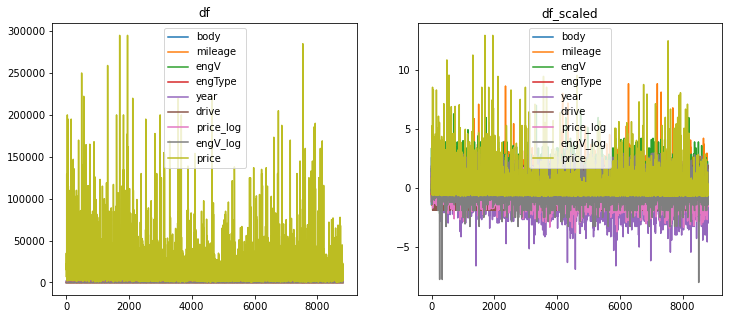

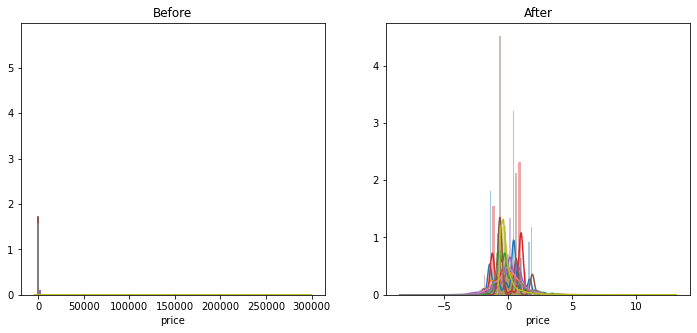

In [172]:
df_scaled_std = get_scaled(df, columns, StandardScaler())

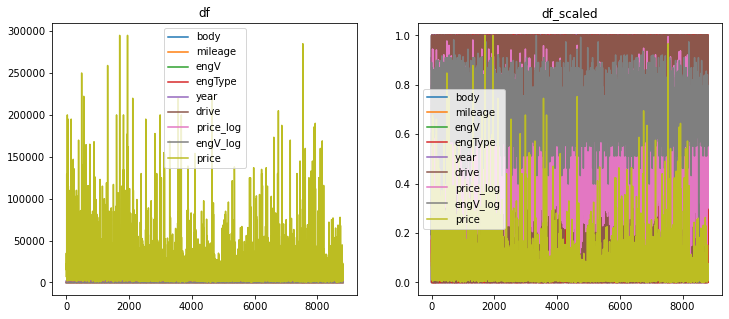

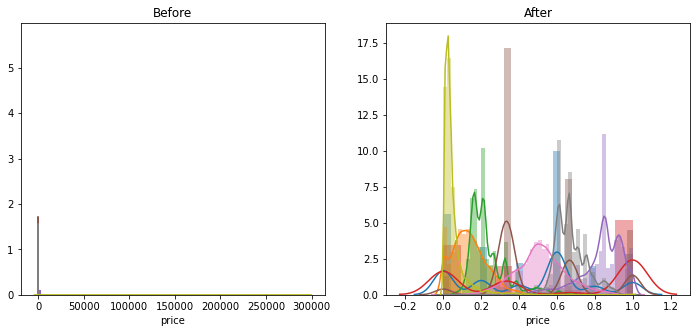

In [173]:
df_scaled_maxmin = get_scaled(df, columns, MinMaxScaler())

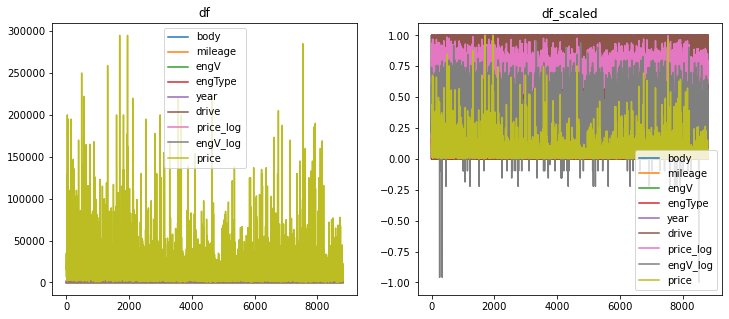

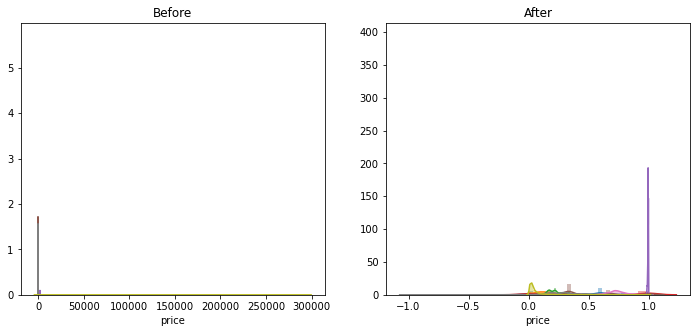

In [174]:
df_scaled_maxabs = get_scaled(df, columns, MaxAbsScaler())

In [175]:
for col in columns:
    df[f'{col}_scaled'] = df_scaled_maxmin[col]
df.head()

,car,price,body,mileage,engV,engType,year,model,drive,price_log,engV_log,body_scaled,mileage_scaled,engV_scaled,engType_scaled,year_scaled,drive_scaled,price_log_scaled,engV_log_scaled,price_scaled
0,Ford,15500.0,0,68,2.5,1,2010,Kuga,2,9.648595,0.916291,0.0,0.068068,0.269663,0.333333,0.894737,0.666667,0.581310,0.715336,0.051709
1,Mercedes-Benz,20500.0,3,173,1.8,1,2011,E-Class,3,9.928180,0.587787,0.6,0.173173,0.191011,0.333333,0.912281,1.000000,0.621043,0.642332,0.068673
2,Mercedes-Benz,35000.0,2,135,5.5,3,2008,CL 550,3,10.463103,1.704748,0.4,0.135135,0.606742,1.000000,0.859649,1.000000,0.697064,0.890556,0.117869
3,Mercedes-Benz,17800.0,5,162,1.8,0,2012,B 180,1,9.786954,0.587787,1.0,0.162162,0.191011,0.000000,0.929825,0.333333,0.600973,0.642332,0.059512
4,Nissan,16600.0,0,83,2.0,3,2013,X-Trail,2,9.717158,0.693147,0.0,0.083083,0.213483,1.000000,0.947368,0.666667,0.591054,0.665746,0.055441


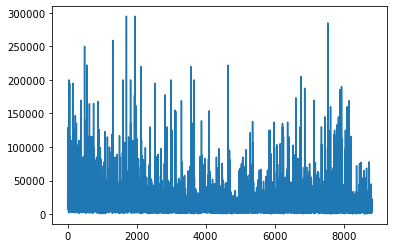

In [176]:
df['price'].plot()

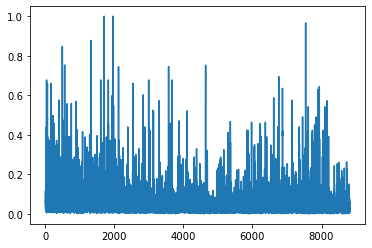

In [177]:
df['price_scaled'].plot()

### Выбросы

In [178]:
import scipy.stats as stats
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

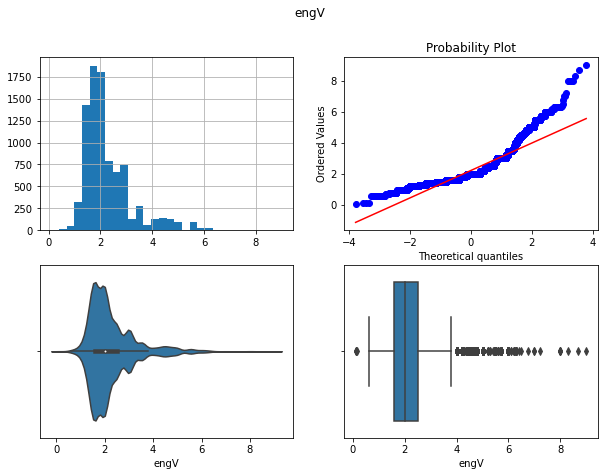

In [179]:
diagnostic_plots(df, 'engV', 'engV')

In [180]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3
    
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

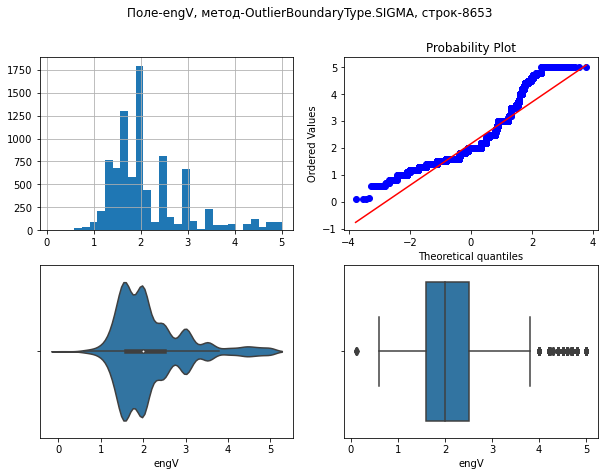

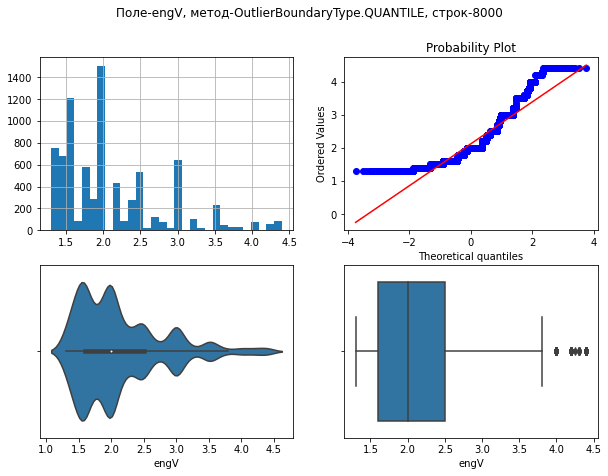

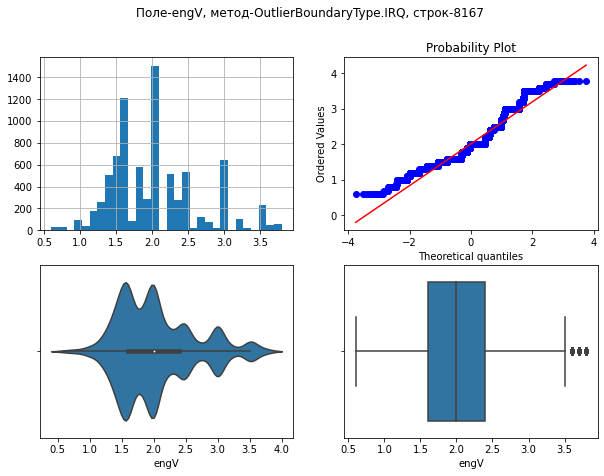

In [181]:
x_col_list = ['engV']
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(df[col] > upper_boundary, True, 
                                 np.where(df[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = df.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

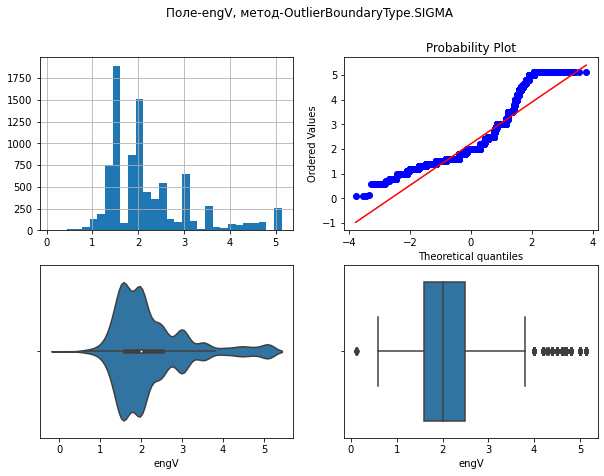

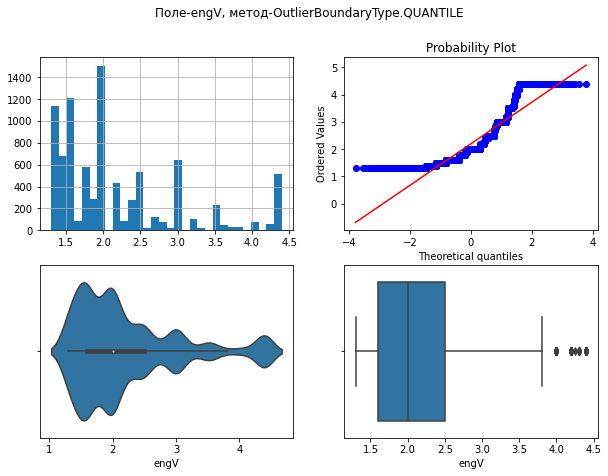

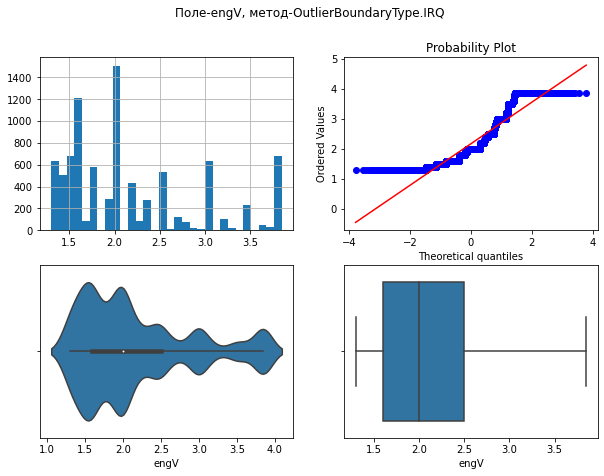

In [182]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df, col, obt)
        # Изменение данных
        df[col] = np.where(df[col] > upper_boundary, upper_boundary, 
                                 np.where(df[col] < lower_boundary, lower_boundary, df[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(df, col, title)

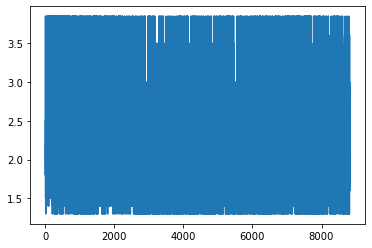

In [183]:
df['engV'].plot()

### Методы фильтрации (filter methods)

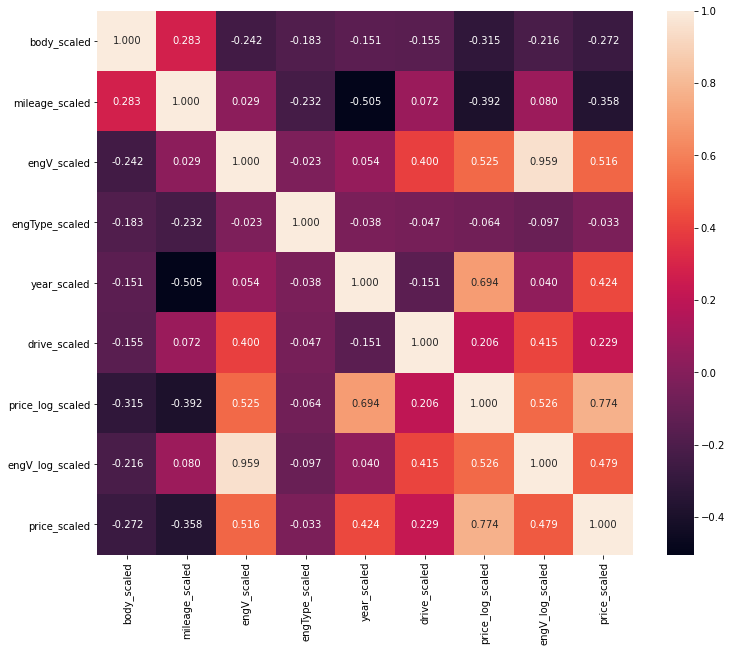

In [184]:
scaled_columns = [f'{x}_scaled' for x in columns]
plt.figure(figsize=(12,10))
sns.heatmap(df[scaled_columns].corr(), annot=True, fmt='.3f')
plt.show()

In [185]:
def make_corr_df(df, tr=0.6):
    cr = df.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= tr]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [186]:
make_corr_df(df)

,f1,f2,corr
0,mileage_scaled,mileage,1.000000
1,mileage,mileage_scaled,1.000000
2,price_log_scaled,price_log,1.000000
3,price_log,price_log_scaled,1.000000
4,price,price_scaled,1.000000
5,price_scaled,price,1.000000
6,engV_log,engV_log_scaled,1.000000
7,engV_log_scaled,engV_log,1.000000
8,engV_log,engV,0.962776
9,engV,engV_log,0.962776


In [187]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [188]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(df))

[['mileage', 'mileage_scaled'],
 ['price_log',
  'price_scaled',
  'price',
  'year_scaled',
  'year',
  'price_log_scaled'],
 ['engV_log_scaled', 'engV', 'engV_scaled', 'engV_log']]

### Методы обертывания

In [189]:
# conda install mlxtend --channel conda-forge

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [208]:
X_ALL = df.drop('mileage', axis=1)

# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, df['mileage'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

efs1 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X_ALL.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 190/190

Best accuracy score: 0.98
Best subset (indices): (11,)
Best subset (corresponding names): ('mileage_scaled',)
